In [67]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
data = pd.read_csv('output/classification/FULL_source_title_description_bin_clf.csv')
data

,source,title,description,text,label
0,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,BTC bulls could secure a $130 million profit i...,Source: CoinTelegraph Title: Bitcoin options d...,1
1,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,Top US crypto exchange Coinbase has given supp...,Source: The Daily Hodl Title: Crypto Exchange ...,0
2,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,"December 5, 2022 As simplified wallet addresse...",Source: The Daily Hodl Title: BitKeep Wallet G...,0
3,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,A bill that would create new licensing and ele...,Source: Bitcoin Magazine Title: Kazakhstan Pre...,0
4,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,Blockchain trilemma is arguably the hardest te...,Source: CoinTelegraph Title: The blockchain tr...,0
...,...,...,...,...,...
1313,U.Today,Ethereum (ETH) Price Analysis for December 23,How great are chances for continued rise of Et...,Source: U.Today Title: Ethereum (ETH) Price An...,0
1314,ZyCrypto,Digital Assets Amongst Vulnerabilities Within ...,The Financial Stability Oversight Council (FSO...,Source: ZyCrypto Title: Digital Assets Amongst...,0
1315,The Daily Hodl,"Cardano, Litecoin and Monero Will Not Be Added...",A top executive of peer-to-peer crypto exchang...,"Source: The Daily Hodl Title: Cardano, Litecoi...",1
1316,ZyCrypto,Binance plans to invest in India’s web3 startu...,Binance’s Chief Technology Officer (CTO) Rohit...,Source: ZyCrypto Title: Binance plans to inves...,1


In [44]:
unsupervised_data = pd.read_csv('output/classification/BING_source_title_description_bin_clf.csv')
unsupervised_data

,source,title,description,text,label
0,CoinTelegraph,Allbridge to first begin repaying stuck bridge...,The compensation process is expected to start ...,Source: CoinTelegraph Title: Allbridge to firs...,0
1,CryptoPotato,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,On-chain analytics revealed a sentiment shift ...,Source: CryptoPotato Title: Bitcoin Hodl Patte...,1
2,CoinTelegraph,ETH hits 7-month high ahead of Shanghai and Ca...,"Ether has broken the $1,900 resistance level f...",Source: CoinTelegraph Title: ETH hits 7-month ...,1
3,CoinTelegraph,"Marathon Digital posts quarterly record of 2,1...","With a new quarterly production record, Marath...",Source: CoinTelegraph Title: Marathon Digital ...,1
4,CryptoPotato,Brazilian Finance Giant BTG Pactual to Issue a...,The stablecoin BTG Dol will supposedly become ...,Source: CryptoPotato Title: Brazilian Finance ...,0
...,...,...,...,...,...
616,CryptoPotato,"El Salvador Launches Bitcoin, Lightning Dev Tr...",The months-long program will offer credit and ...,Source: CryptoPotato Title: El Salvador Launch...,0
617,CoinTelegraph,Worlds collide at Bitcoin-based DeFi project —...,Ordinals NFTs have split the Bitcoin community...,Source: CoinTelegraph Title: Worlds collide at...,1
618,CoinTelegraph,Euler Finance hacker starts returning stolen E...,Chances that the hacker will return the entire...,Source: CoinTelegraph Title: Euler Finance hac...,1
619,CryptoNews,Bitcoin Price and Ethereum Prediction: BTC and...,Bitcoin (BTC) and Ethereum (ETH) have seen sig...,Source: CryptoNews Title: Bitcoin Price and Et...,1


In [45]:
data = pd.concat([data, unsupervised_data], axis=0)

In [46]:
data

,source,title,description,text,label
0,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,BTC bulls could secure a $130 million profit i...,Source: CoinTelegraph Title: Bitcoin options d...,1
1,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,Top US crypto exchange Coinbase has given supp...,Source: The Daily Hodl Title: Crypto Exchange ...,0
2,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,"December 5, 2022 As simplified wallet addresse...",Source: The Daily Hodl Title: BitKeep Wallet G...,0
3,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,A bill that would create new licensing and ele...,Source: Bitcoin Magazine Title: Kazakhstan Pre...,0
4,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,Blockchain trilemma is arguably the hardest te...,Source: CoinTelegraph Title: The blockchain tr...,0
...,...,...,...,...,...
616,CryptoPotato,"El Salvador Launches Bitcoin, Lightning Dev Tr...",The months-long program will offer credit and ...,Source: CryptoPotato Title: El Salvador Launch...,0
617,CoinTelegraph,Worlds collide at Bitcoin-based DeFi project —...,Ordinals NFTs have split the Bitcoin community...,Source: CoinTelegraph Title: Worlds collide at...,1
618,CoinTelegraph,Euler Finance hacker starts returning stolen E...,Chances that the hacker will return the entire...,Source: CoinTelegraph Title: Euler Finance hac...,1
619,CryptoNews,Bitcoin Price and Ethereum Prediction: BTC and...,Bitcoin (BTC) and Ethereum (ETH) have seen sig...,Source: CryptoNews Title: Bitcoin Price and Et...,1


<Axes: xlabel='label', ylabel='count'>

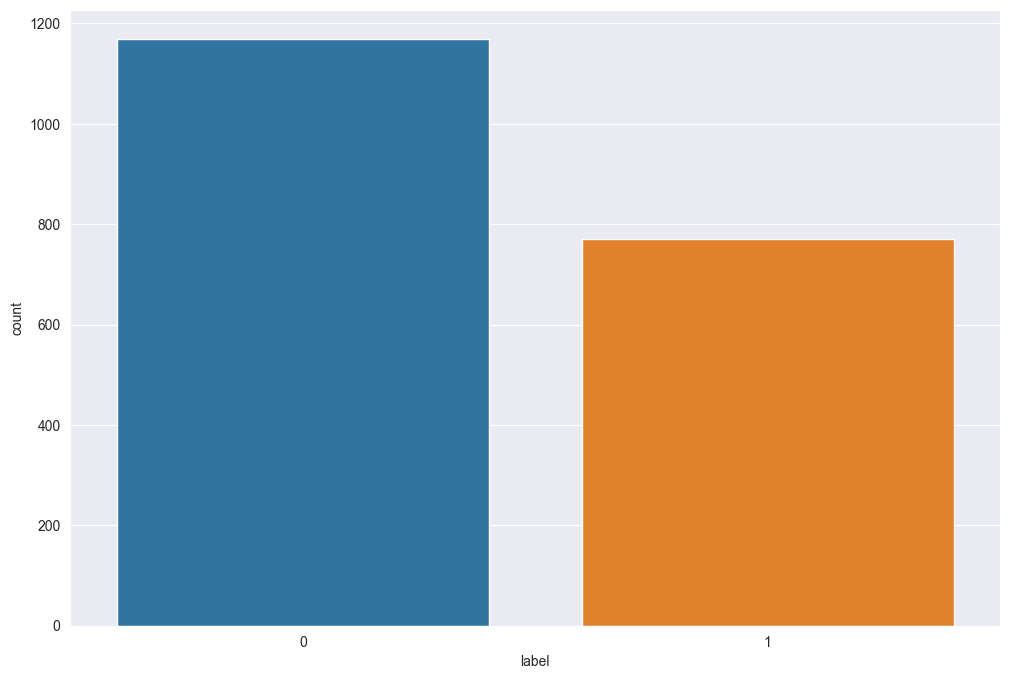

In [47]:
plt.figure(figsize=(12, 8))
sns.countplot(x=data['label'])

In [48]:
from io import StringIO
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939 entries, 0 to 620
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       1939 non-null   object
 1   title        1939 non-null   object
 2   description  1939 non-null   object
 3   text         1939 non-null   object
 4   label        1939 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 90.9+ KB


In [50]:
data = data[~data['description'].isna()]
data

,source,title,description,text,label
0,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,BTC bulls could secure a $130 million profit i...,Source: CoinTelegraph Title: Bitcoin options d...,1
1,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,Top US crypto exchange Coinbase has given supp...,Source: The Daily Hodl Title: Crypto Exchange ...,0
2,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,"December 5, 2022 As simplified wallet addresse...",Source: The Daily Hodl Title: BitKeep Wallet G...,0
3,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,A bill that would create new licensing and ele...,Source: Bitcoin Magazine Title: Kazakhstan Pre...,0
4,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,Blockchain trilemma is arguably the hardest te...,Source: CoinTelegraph Title: The blockchain tr...,0
...,...,...,...,...,...
616,CryptoPotato,"El Salvador Launches Bitcoin, Lightning Dev Tr...",The months-long program will offer credit and ...,Source: CryptoPotato Title: El Salvador Launch...,0
617,CoinTelegraph,Worlds collide at Bitcoin-based DeFi project —...,Ordinals NFTs have split the Bitcoin community...,Source: CoinTelegraph Title: Worlds collide at...,1
618,CoinTelegraph,Euler Finance hacker starts returning stolen E...,Chances that the hacker will return the entire...,Source: CoinTelegraph Title: Euler Finance hac...,1
619,CryptoNews,Bitcoin Price and Ethereum Prediction: BTC and...,Bitcoin (BTC) and Ethereum (ETH) have seen sig...,Source: CryptoNews Title: Bitcoin Price and Et...,1


In [51]:
data = data.drop_duplicates(['description'])
data

,source,title,description,text,label
0,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,BTC bulls could secure a $130 million profit i...,Source: CoinTelegraph Title: Bitcoin options d...,1
1,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,Top US crypto exchange Coinbase has given supp...,Source: The Daily Hodl Title: Crypto Exchange ...,0
2,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,"December 5, 2022 As simplified wallet addresse...",Source: The Daily Hodl Title: BitKeep Wallet G...,0
3,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,A bill that would create new licensing and ele...,Source: Bitcoin Magazine Title: Kazakhstan Pre...,0
4,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,Blockchain trilemma is arguably the hardest te...,Source: CoinTelegraph Title: The blockchain tr...,0
...,...,...,...,...,...
616,CryptoPotato,"El Salvador Launches Bitcoin, Lightning Dev Tr...",The months-long program will offer credit and ...,Source: CryptoPotato Title: El Salvador Launch...,0
617,CoinTelegraph,Worlds collide at Bitcoin-based DeFi project —...,Ordinals NFTs have split the Bitcoin community...,Source: CoinTelegraph Title: Worlds collide at...,1
618,CoinTelegraph,Euler Finance hacker starts returning stolen E...,Chances that the hacker will return the entire...,Source: CoinTelegraph Title: Euler Finance hac...,1
619,CryptoNews,Bitcoin Price and Ethereum Prediction: BTC and...,Bitcoin (BTC) and Ethereum (ETH) have seen sig...,Source: CryptoNews Title: Bitcoin Price and Et...,1


In [52]:
data['description'] = data['description'].apply(strip_tags)
data = data.reset_index(drop=True)
data

,source,title,description,text,label
0,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,BTC bulls could secure a $130 million profit i...,Source: CoinTelegraph Title: Bitcoin options d...,1
1,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,Top US crypto exchange Coinbase has given supp...,Source: The Daily Hodl Title: Crypto Exchange ...,0
2,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,"December 5, 2022 As simplified wallet addresse...",Source: The Daily Hodl Title: BitKeep Wallet G...,0
3,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,A bill that would create new licensing and ele...,Source: Bitcoin Magazine Title: Kazakhstan Pre...,0
4,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,Blockchain trilemma is arguably the hardest te...,Source: CoinTelegraph Title: The blockchain tr...,0
...,...,...,...,...,...
1924,CryptoPotato,"El Salvador Launches Bitcoin, Lightning Dev Tr...",The months-long program will offer credit and ...,Source: CryptoPotato Title: El Salvador Launch...,0
1925,CoinTelegraph,Worlds collide at Bitcoin-based DeFi project —...,Ordinals NFTs have split the Bitcoin community...,Source: CoinTelegraph Title: Worlds collide at...,1
1926,CoinTelegraph,Euler Finance hacker starts returning stolen E...,Chances that the hacker will return the entire...,Source: CoinTelegraph Title: Euler Finance hac...,1
1927,CryptoNews,Bitcoin Price and Ethereum Prediction: BTC and...,Bitcoin (BTC) and Ethereum (ETH) have seen sig...,Source: CryptoNews Title: Bitcoin Price and Et...,1


In [53]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
tfidf_vectorizer

TfidfVectorizer(stop_words='english')

In [54]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data['description'])
tfidf_matrix

<1929x7109 sparse matrix of type '<class 'numpy.float64'>'
	with 36268 stored elements in Compressed Sparse Row format>

In [55]:
tfidf_data = pd.DataFrame(tfidf_matrix.toarray())
tfidf_data

,0,1,2,3,4,5,6,7,8,9,...,7099,7100,7101,7102,7103,7104,7105,7106,7107,7108
0,0.0,0.151081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1925,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1926,0.0,0.145955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1927,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names

array(['00', '000', '00001', ..., 'zksync', 'zone', 'zuckerberg'],
      dtype=object)

In [57]:
tfidf_data.columns = feature_names
tfidf_data

,00,000,00001,00001085,00001087,00001088,00001120,00012616,00012738,01,...,zeldin,zero,zhao,zipmex,zk,zk_nhpq0,zkevm,zksync,zone,zuckerberg
0,0.0,0.151081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1925,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1926,0.0,0.145955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1927,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
names = [
    'Nearest Neighbors',
    'Linear SVM',
    'RBF SVM',
    'Gaussian Process',
    'Decision Tree',
    'Random Forest',
    'Neural Net',
    'AdaBoost',
    'QDA',
]

grids = {
    'Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'p': [1, 2]
    },
    'Linear SVM': {
        'kernel': ['linear'],
        'C': [0.025, 0.25, 0.5, 1]
    },
    'RBF SVM': {
        'gamma': [1, 2, 'scale'],
        'C': [0.025, 0.25, 0.5, 1]
    },
    'Gaussian Process': {
        'kernel': [1.0 * RBF(1.0)]
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [5, 15, 50],
        'min_samples_split': [2, 4, 8]
    },
    'Random Forest': {
        'n_estimators': [10, 100, 500],
        'max_depth': [5, 15, 50],
        'max_features': [1, 'sqrt']
    },
    'Neural Net': {
        'alpha': [0.25, 0.5, 1],
        'max_iter': [1000]
    },
    'AdaBoost': {
        'n_estimators': [10, 100, 500],
        'learning_rate': [0.01, 0.1, 1]
    },
    'QDA': {}
}

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(),
]

In [59]:
tsvd = TruncatedSVD(n_components=75, random_state=37)
vec_matrix_tsvd = tsvd.fit_transform(tfidf_matrix)
vec_matrix_tsvd

array([[ 0.17864201,  0.06597145, -0.14956263, ..., -0.01820019,
        -0.04501835,  0.02306437],
       [ 0.18329592, -0.05720337,  0.15584034, ..., -0.02558097,
         0.05190875, -0.02685252],
       [ 0.06580177, -0.06439348,  0.09565665, ..., -0.00387603,
         0.00574821,  0.03377501],
       ...,
       [ 0.081048  , -0.00527711,  0.00965817, ...,  0.01123897,
         0.0303084 ,  0.01164039],
       [ 0.28544778, -0.01620037, -0.04955858, ..., -0.00869978,
         0.05042692,  0.06445445],
       [ 0.14631325,  0.0309432 , -0.12378849, ...,  0.02359379,
         0.02325984, -0.06412454]])

In [60]:
vec_matrix_tsvd.shape

(1929, 75)

In [61]:
# 1318 + 611

In [62]:
X, y = vec_matrix_tsvd, data['label']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
        X[:1318], y[:1318], test_size=0.3, random_state=42
    )

In [68]:
X_train = np.concatenate([X_train, X[1318:]], axis=0)
y_train = np.concatenate([y_train, y[1318:]], axis=0)

In [69]:
results = dict()

In [70]:
for name, clf in zip(names, classifiers):
    print('*' * 30, '--> Classifying with', name, '*' * 30)
    
    grid = GridSearchCV(clf, grids[name], refit=True, verbose=3, n_jobs=-1) 
   
    # fitting the model for grid search 
    grid.fit(X_train, y_train) 

    # print best parameter after tuning 
    print(grid.best_params_) 

    score = grid.score(X_test, y_test)
    y_pred = grid.predict(X_test)
    print('--> Score', score)
    results[name] = classification_report(y_test, y_pred)

****************************** --> Classifying with Nearest Neighbors ******************************
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'n_neighbors': 7, 'p': 2}
--> Score 0.6237373737373737
****************************** --> Classifying with Linear SVM ******************************
Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'C': 1, 'kernel': 'linear'}
--> Score 0.6818181818181818
****************************** --> Classifying with RBF SVM ******************************
Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 1, 'gamma': 'scale'}
--> Score 0.6691919191919192
****************************** --> Classifying with Gaussian Process ******************************
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'kernel': 1**2 * RBF(length_scale=1)}
--> Score 0.6641414141414141
****************************** --> Classifying with Decision Tree ******************************
Fitting 5 folds for each of 27 candidat

In [71]:
for key, res in results.items():
    print('--> Model', key)
    print(res)

--> Model Nearest Neighbors
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       254
           1       0.45      0.24      0.31       142

    accuracy                           0.62       396
   macro avg       0.56      0.54      0.53       396
weighted avg       0.59      0.62      0.59       396

--> Model Linear SVM
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       254
           1       0.68      0.21      0.32       142

    accuracy                           0.68       396
   macro avg       0.68      0.58      0.56       396
weighted avg       0.68      0.68      0.62       396

--> Model RBF SVM
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       254
           1       0.56      0.34      0.42       142

    accuracy                           0.67       396
   macro avg       0.63      0.60      0.60       396
weighte

In [111]:
data['combined'] = 'Source: ' + data['source'] + ' Title: ' + data['title'] + ' Description: ' + data['description']
data['combined']

0       Source: CoinTelegraph Title: Bitcoin options d...
1       Source: The Daily Hodl Title: Crypto Exchange ...
2       Source: The Daily Hodl Title: BitKeep Wallet G...
3       Source: Bitcoin Magazine Title: Kazakhstan Pre...
4       Source: CoinTelegraph Title: The blockchain tr...
                              ...                        
1331    Source: U.Today Title: Ethereum (ETH) Price An...
1332    Source: ZyCrypto Title: Digital Assets Amongst...
1333    Source: The Daily Hodl Title: Cardano, Litecoi...
1334    Source: ZyCrypto Title: Binance plans to inves...
1335    Source: ZyCrypto Title: Regulation Alone Isn’t...
Name: combined, Length: 1336, dtype: object

In [112]:
data = data[~data['combined'].isna()]
data['combined']

0       Source: CoinTelegraph Title: Bitcoin options d...
1       Source: The Daily Hodl Title: Crypto Exchange ...
2       Source: The Daily Hodl Title: BitKeep Wallet G...
3       Source: Bitcoin Magazine Title: Kazakhstan Pre...
4       Source: CoinTelegraph Title: The blockchain tr...
                              ...                        
1331    Source: U.Today Title: Ethereum (ETH) Price An...
1332    Source: ZyCrypto Title: Digital Assets Amongst...
1333    Source: The Daily Hodl Title: Cardano, Litecoi...
1334    Source: ZyCrypto Title: Binance plans to inves...
1335    Source: ZyCrypto Title: Regulation Alone Isn’t...
Name: combined, Length: 1318, dtype: object

In [113]:
data_input = data[['combined', 'label']].copy()
data_input.columns = ['text', 'label']
data_input['text'] = data_input['text']
data_input['label'] = data_input['label']
data_input

,text,label
0,Source: CoinTelegraph Title: Bitcoin options d...,1
1,Source: The Daily Hodl Title: Crypto Exchange ...,0
2,Source: The Daily Hodl Title: BitKeep Wallet G...,0
3,Source: Bitcoin Magazine Title: Kazakhstan Pre...,0
4,Source: CoinTelegraph Title: The blockchain tr...,0
...,...,...
1331,Source: U.Today Title: Ethereum (ETH) Price An...,0
1332,Source: ZyCrypto Title: Digital Assets Amongst...,0
1333,"Source: The Daily Hodl Title: Cardano, Litecoi...",1
1334,Source: ZyCrypto Title: Binance plans to inves...,1


/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

[CV 4/5] END ................n_neighbors=3, p=1;, score=0.545 total time=   0.0s
[CV 4/5] END ................n_neighbors=5, p=1;, score=0.567 total time=   0.0s
[CV 5/5] END ................n_neighbors=5, p=2;, score=0.604 total time=   0.0s
[CV 2/5] END ................n_neighbors=7, p=2;, score=0.668 total time=   0.0s
[CV 2/5] END ............C=0.025, kernel=linear;, score=0.620 total time=   0.0s
[CV 3/5] END .............C=0.25, kernel=linear;, score=0.620 total time=   0.0s
[CV 5/5] END ..............C=0.5, kernel=linear;, score=0.620 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.626 total time=   0.0s
[CV 4/5] END ..................C=0.025, gamma=1;, score=0.620 total time=   0.1s
[CV 1/5] END ..............C=0.025, gamma=scale;, score=0.620 total time=   0.1s
[CV 4/5] END ...................C=0.25, gamma=1;, score=0.615 total time=   0.1s
[CV 5/5] END ...................C=0.25, gamma=1;, score=0.626 total time=   0.1s
[CV 5/5] END ...............

/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

[CV 1/5] END ................n_neighbors=3, p=1;, score=0.647 total time=   0.0s
[CV 2/5] END ................n_neighbors=5, p=1;, score=0.642 total time=   0.0s
[CV 1/5] END ................n_neighbors=7, p=1;, score=0.615 total time=   0.0s
[CV 3/5] END ................n_neighbors=7, p=2;, score=0.663 total time=   0.0s
[CV 5/5] END ............C=0.025, kernel=linear;, score=0.626 total time=   0.0s
[CV 1/5] END ..............C=0.5, kernel=linear;, score=0.620 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.636 total time=   0.0s
[CV 5/5] END ..................C=0.025, gamma=1;, score=0.626 total time=   0.1s
[CV 3/5] END ..............C=0.025, gamma=scale;, score=0.620 total time=   0.1s
[CV 3/5] END ...................C=0.25, gamma=2;, score=0.620 total time=   0.1s
[CV 4/5] END ...................C=0.25, gamma=2;, score=0.615 total time=   0.1s
[CV 4/5] END ....................C=0.5, gamma=2;, score=0.626 total time=   0.1s
[CV 5/5] END ...............

/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

[CV 5/5] END ................n_neighbors=3, p=1;, score=0.599 total time=   0.0s
[CV 1/5] END ................n_neighbors=5, p=2;, score=0.642 total time=   0.0s
[CV 2/5] END ................n_neighbors=7, p=1;, score=0.658 total time=   0.0s
[CV 4/5] END ................n_neighbors=7, p=2;, score=0.642 total time=   0.0s
[CV 1/5] END .............C=0.25, kernel=linear;, score=0.620 total time=   0.0s
[CV 4/5] END ..............C=0.5, kernel=linear;, score=0.610 total time=   0.0s
[CV 1/5] END ..................C=0.025, gamma=1;, score=0.620 total time=   0.1s
[CV 4/5] END ..................C=0.025, gamma=2;, score=0.620 total time=   0.1s
[CV 2/5] END ...................C=0.25, gamma=1;, score=0.620 total time=   0.0s
[CV 3/5] END ...................C=0.25, gamma=1;, score=0.620 total time=   0.1s
[CV 3/5] END ....................C=0.5, gamma=1;, score=0.631 total time=   0.1s
[CV 4/5] END ....................C=0.5, gamma=1;, score=0.626 total time=   0.0s
[CV 4/5] END ...............

/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

[CV 3/5] END ................n_neighbors=3, p=1;, score=0.545 total time=   0.0s
[CV 5/5] END ................n_neighbors=5, p=1;, score=0.620 total time=   0.0s
[CV 4/5] END ................n_neighbors=7, p=1;, score=0.663 total time=   0.0s
[CV 3/5] END ..............C=0.5, kernel=linear;, score=0.620 total time=   0.0s
[CV 3/5] END ..................C=0.025, gamma=1;, score=0.620 total time=   0.1s
[CV 2/5] END ..............C=0.025, gamma=scale;, score=0.620 total time=   0.1s
[CV 5/5] END ...................C=0.25, gamma=2;, score=0.620 total time=   0.1s
[CV 1/5] END ...............C=0.25, gamma=scale;, score=0.631 total time=   0.1s
[CV 3/5] END ................C=0.5, gamma=scale;, score=0.615 total time=   0.1s
[CV 4/5] END ................C=0.5, gamma=scale;, score=0.620 total time=   0.1s
[CV 5/5] END ......................C=1, gamma=2;, score=0.610 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_split=2;, score=0.594 total time=   0.0s
[CV 1/5] END c

/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

In [114]:
data_input.to_csv('./output/classification/source_title_description_bin_clf.csv', index=False)

In [72]:
data['label'] = data['label'].apply(lambda x: 'change' if x in [-1, 1] else 'no effect')
data

,source,title,description,text,label
0,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,BTC bulls could secure a $130 million profit i...,Source: CoinTelegraph Title: Bitcoin options d...,change
1,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,Top US crypto exchange Coinbase has given supp...,Source: The Daily Hodl Title: Crypto Exchange ...,no effect
2,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,"December 5, 2022 As simplified wallet addresse...",Source: The Daily Hodl Title: BitKeep Wallet G...,no effect
3,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,A bill that would create new licensing and ele...,Source: Bitcoin Magazine Title: Kazakhstan Pre...,no effect
4,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,Blockchain trilemma is arguably the hardest te...,Source: CoinTelegraph Title: The blockchain tr...,no effect
...,...,...,...,...,...
1924,CryptoPotato,"El Salvador Launches Bitcoin, Lightning Dev Tr...",The months-long program will offer credit and ...,Source: CryptoPotato Title: El Salvador Launch...,no effect
1925,CoinTelegraph,Worlds collide at Bitcoin-based DeFi project —...,Ordinals NFTs have split the Bitcoin community...,Source: CoinTelegraph Title: Worlds collide at...,change
1926,CoinTelegraph,Euler Finance hacker starts returning stolen E...,Chances that the hacker will return the entire...,Source: CoinTelegraph Title: Euler Finance hac...,change
1927,CryptoNews,Bitcoin Price and Ethereum Prediction: BTC and...,Bitcoin (BTC) and Ethereum (ETH) have seen sig...,Source: CryptoNews Title: Bitcoin Price and Et...,change


In [73]:
data_input = data[['text', 'label']].copy()
data_input.columns = ['prompt', 'completion']
data_input['prompt'] = data_input['prompt'] + '\n\n###\n\n'
data_input['completion'] = ' ' + data_input['completion'] + ' END'
data_input

,prompt,completion
0,Source: CoinTelegraph Title: Bitcoin options d...,change END
1,Source: The Daily Hodl Title: Crypto Exchange ...,no effect END
2,Source: The Daily Hodl Title: BitKeep Wallet G...,no effect END
3,Source: Bitcoin Magazine Title: Kazakhstan Pre...,no effect END
4,Source: CoinTelegraph Title: The blockchain tr...,no effect END
...,...,...
1924,Source: CryptoPotato Title: El Salvador Launch...,no effect END
1925,Source: CoinTelegraph Title: Worlds collide at...,change END
1926,Source: CoinTelegraph Title: Euler Finance hac...,change END
1927,Source: CryptoNews Title: Bitcoin Price and Et...,change END


In [75]:
data_input.to_json('./output/classification/FINAL_source_title_description.jsonl', orient='records', lines=True)
data_input.to_csv('./output/classification/FINAL_source_title_description.csv', index=False)